In [74]:
import os
from pathlib import Path

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [76]:
data_path=Path("dataset")
image_path=data_path
train_path = image_path / "train"
test_path = image_path / "test"
val_path=image_path/"val"

In [79]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [81]:
walk_through_dir(image_path)

There are 3 directories and 2 images in 'dataset'.
There are 4 directories and 0 images in 'dataset\test'.
There are 0 directories and 25 images in 'dataset\test\diseased cotton leaf'.
There are 0 directories and 28 images in 'dataset\test\diseased cotton plant'.
There are 0 directories and 26 images in 'dataset\test\fresh cotton leaf'.
There are 0 directories and 27 images in 'dataset\test\fresh cotton plant'.
There are 4 directories and 0 images in 'dataset\train'.
There are 0 directories and 288 images in 'dataset\train\diseased cotton leaf'.
There are 0 directories and 815 images in 'dataset\train\diseased cotton plant'.
There are 0 directories and 427 images in 'dataset\train\fresh cotton leaf'.
There are 0 directories and 421 images in 'dataset\train\fresh cotton plant'.
There are 4 directories and 0 images in 'dataset\val'.
There are 0 directories and 43 images in 'dataset\val\diseased cotton leaf'.
There are 0 directories and 78 images in 'dataset\val\diseased cotton plant'.
Th

In [83]:
train_set = datasets.ImageFolder(root=train_path)
test_set = datasets.ImageFolder(root=test_path)
val_set = datasets.ImageFolder(root=val_path)

train_set.classes

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [85]:
classnames=train_set.classes

In [87]:
import random
from PIL import Image

image_path_list=list(image_path.glob("*/*/*.jpg"))

In [89]:
randomimg=random.choice(image_path_list)
image=randomimg

In [91]:
print(randomimg)

dataset\train\diseased cotton plant\dd (445)_iaip.jpg


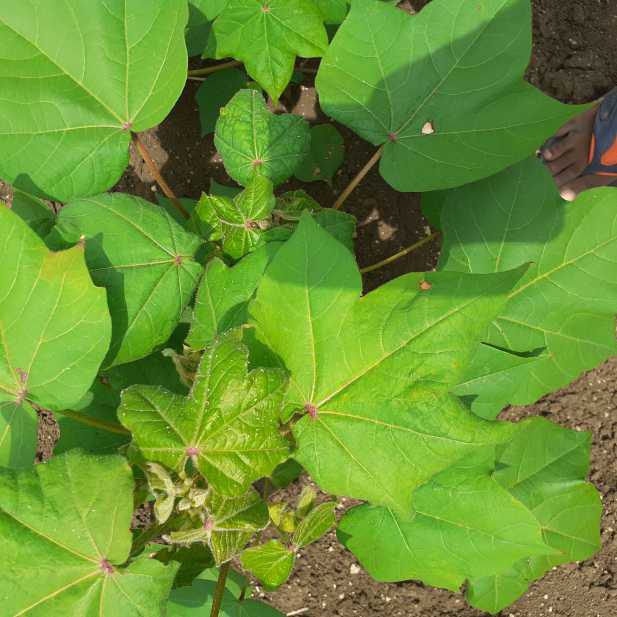

In [93]:

image=Image.open(randomimg)
image

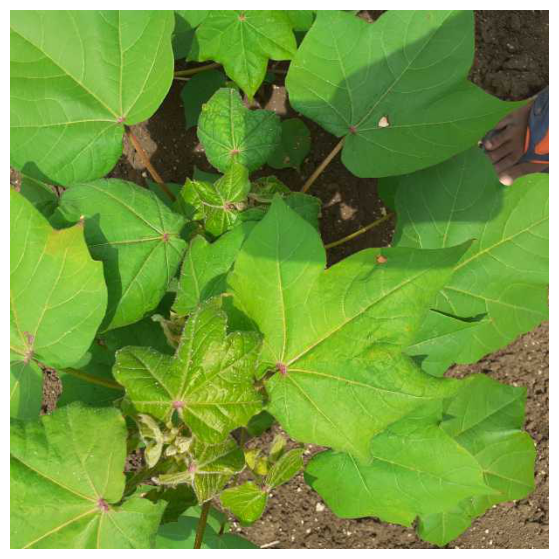

In [95]:
import numpy as np
import matplotlib.pyplot as plt


img_as_array = np.asarray(image)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)

plt.axis(False);

In [97]:
data_transform=transforms.Compose([transforms.Resize((64,64)),transforms.RandomHorizontalFlip(p=0.5),
                               transforms.ToTensor()])

In [24]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_data=ImageFolder(train_path,transform=data_transform,target_transform=None)
test_data=ImageFolder(test_path,transform=data_transform,target_transform=None)

In [26]:
train_data

Dataset ImageFolder
    Number of datapoints: 1951
    Root location: dataset\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [28]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [30]:
train_data_Loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_data_Loader=DataLoader(test_data,batch_size=32,)

In [32]:

import torch
from torch import nn
class CnnModel_1(nn.Module):
  def __init__(self,input_features,hidden_units,output_shape):
    super().__init__()
    self.conv_Block1=nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)

    )
    self.conv_Block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_Block3=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,out_features=output_shape)
    )


  def forward(self,x):
      x=self.conv_Block1(x)
      print(x.shape)
      x=self.conv_Block2(x)
      print(x.shape)
      x=self.conv_Block2(x)
      print(x.shape)
      x=self.classifier(x)
      print(x.shape)
      return x


In [34]:
CnnModel_1(input_features=3,hidden_units=10,output_shape=4)

CnnModel_1(
  (conv_Block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_Block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_Block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [36]:
model=CnnModel_1(input_features=3,hidden_units=16,output_shape=4)

In [38]:
img_batch, label_batch = next(iter(train_data_Loader))

In [40]:
model(img_batch)

torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])


tensor([[-0.0306, -0.0102,  0.0063,  0.0570],
        [-0.0301, -0.0102,  0.0057,  0.0573],
        [-0.0306, -0.0102,  0.0053,  0.0570],
        [-0.0306, -0.0100,  0.0053,  0.0569],
        [-0.0308, -0.0107,  0.0058,  0.0571],
        [-0.0308, -0.0104,  0.0058,  0.0569],
        [-0.0305, -0.0111,  0.0062,  0.0572],
        [-0.0304, -0.0104,  0.0060,  0.0569],
        [-0.0311, -0.0107,  0.0060,  0.0570],
        [-0.0300, -0.0095,  0.0055,  0.0565],
        [-0.0306, -0.0104,  0.0057,  0.0572],
        [-0.0302, -0.0098,  0.0052,  0.0571],
        [-0.0308, -0.0102,  0.0062,  0.0567],
        [-0.0303, -0.0101,  0.0057,  0.0571],
        [-0.0306, -0.0103,  0.0051,  0.0568],
        [-0.0304, -0.0104,  0.0059,  0.0566],
        [-0.0302, -0.0106,  0.0060,  0.0575],
        [-0.0309, -0.0103,  0.0058,  0.0565],
        [-0.0305, -0.0103,  0.0058,  0.0566],
        [-0.0303, -0.0098,  0.0054,  0.0566],
        [-0.0303, -0.0103,  0.0061,  0.0568],
        [-0.0312, -0.0112,  0.0061

In [43]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):
  model.train()

  train_loss=0
  train_acc=0

  for batch,(X,y) in enumerate(dataloader):


    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss,train_acc


In [45]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              ):
  loss=0
  acc=0
  model.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(data_loader):
      y_pred=model(X)
      loss=loss_fn(y_pred,y)
      loss+=loss.item()

      y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
      acc += (y_pred_class==y).sum().item()/len(y_pred)




  loss=loss/len(data_loader)
  acc=acc/len(data_loader)

  return loss,acc





In [47]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [59]:
NUM_EPOCHS = 10
model_1=CnnModel_1(3,16,4)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),lr=0.001)

from timeit import default_timer as timer
start_time = timer()
model_1_results = train(model=model_1,
                        train_dataloader=train_data_Loader,
                        test_dataloader=test_data_Loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16])
torch.Size([32, 16, 8, 8])
torch.Size([32, 4])
torch.Size([32, 16, 32, 32])
torch.Size([32, 16, 16, 16

In [61]:
torch.save({
            'epoch': NUM_EPOCHS, # Replace epoch with NUM_EPOCHS
            'model_state_dict': model_1.state_dict(), # Replace model with model_1
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': model_1_results["train_loss"][-1], # Access last training loss from results
            }, 'cotton_disease_classification_model_1') # Add a file name for saving the model

In [ ]:
torch.save(model, "cotton_disease_model")

In [ ]:
# Check the model_0_results keys
model_1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [63]:

from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

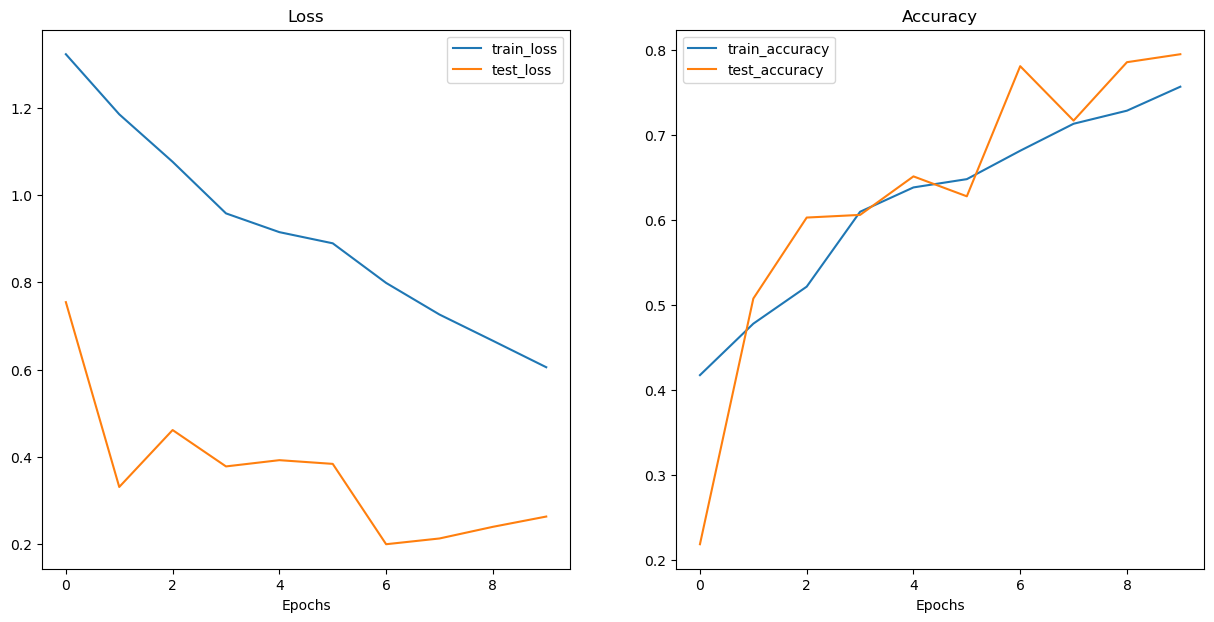

In [65]:
plot_loss_curves(model_1_results)

In [70]:
from pathlib import Path
import torchvision

# Specify the folder for the chosen category
custom_folder = Path('dataset/val/diseased cotton leaf')

# List all image files in the folder
image_files = list(custom_folder.glob('*'))  # Use * to list all files

# Check if there are images in the folder
if not image_files:
    raise FileNotFoundError(f"No image files found in {custom_folder}")

# Select the first image file
custom_image_path = image_files[10]
print(f"Selected image file: {custom_image_path}")

# Read the chosen image as a tensor
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image_uint8=custom_image_uint8/255

# Print image details
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")



Selected image file: dataset\val\diseased cotton leaf\dis_leaf (19)_iaip.jpg
Custom image tensor:
tensor([[[0.6431, 0.6549, 0.6706,  ..., 0.4078, 0.4078, 0.4039],
         [0.6471, 0.6549, 0.6627,  ..., 0.4078, 0.4078, 0.4039],
         [0.6510, 0.6510, 0.6627,  ..., 0.4118, 0.4078, 0.4039],
         ...,
         [0.6431, 0.6353, 0.6314,  ..., 0.3804, 0.3765, 0.3725],
         [0.6431, 0.6353, 0.6314,  ..., 0.3765, 0.3725, 0.3725],
         [0.6431, 0.6353, 0.6314,  ..., 0.3725, 0.3686, 0.3686]],

        [[0.7686, 0.7843, 0.8000,  ..., 0.5882, 0.5882, 0.5843],
         [0.7725, 0.7843, 0.7922,  ..., 0.5882, 0.5882, 0.5843],
         [0.7804, 0.7804, 0.7804,  ..., 0.5922, 0.5882, 0.5843],
         ...,
         [0.7725, 0.7725, 0.7686,  ..., 0.5176, 0.5137, 0.5098],
         [0.7725, 0.7725, 0.7686,  ..., 0.5137, 0.5098, 0.5098],
         [0.7725, 0.7725, 0.7686,  ..., 0.5098, 0.5059, 0.5059]],

        [[0.5725, 0.5765, 0.5843,  ..., 0.2941, 0.2941, 0.2902],
         [0.5765, 0.5765,

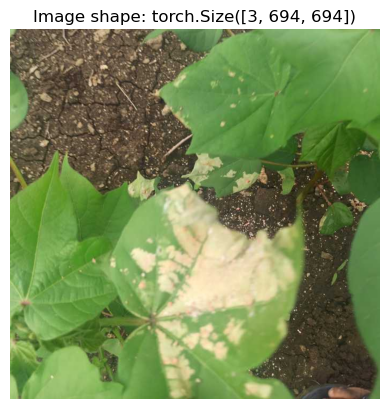

In [72]:
# Plot custom image
plt.imshow(custom_image_uint8.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image_uint8.shape}")
plt.axis(False);

In [74]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image_uint8)

# Print out original shape and new shape
print(f"Original shape: {custom_image_uint8.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 694, 694])
New shape: torch.Size([3, 64, 64])


In [76]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])
torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 16, 16])
torch.Size([1, 16, 8, 8])
torch.Size([1, 4])


In [78]:
custom_image_pred

tensor([[  4.5689,  -3.5946, -10.0599,  -0.5365]])

In [80]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[  4.5689,  -3.5946, -10.0599,  -0.5365]])
Prediction probabilities: tensor([[9.9369e-01, 2.8307e-04, 4.4059e-07, 6.0252e-03]])
Prediction label: tensor([0])


In [88]:
# Find the predicted label
custom_image_pred_class = classnames[custom_image_pred_label] # put pred label to CPU, otherwise will error
custom_image_pred_class

'diseased cotton leaf'

In [ ]:
train_data.classes

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

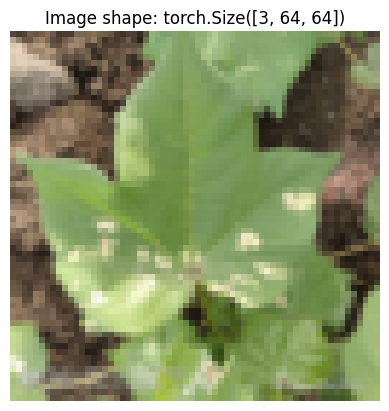

In [ ]:
# Plot custom image
plt.imshow(custom_image_transformed.permute(1, 2, 0)) # Use custom_image_transformed instead of custom_image
plt.title(f"Image shape: {custom_image_transformed.shape}") # Update title with correct shape
plt.axis(False);

Going Modular--

In [64]:
train
test_step
train_step

<function __main__.train_step(model: torch.nn.modules.module.Module, dataloader: torch.utils.data.dataloader.DataLoader, loss_fn: torch.nn.modules.module.Module, optimizer: torch.optim.optimizer.Optimizer)>

In [45]:

%%writefile engine.py
from typing import Dict,List,Tuple
import torch
import torch.nn as nn
from tqdm.auto import tqdm

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):
  model.train()

  train_loss=0
  train_acc=0

  for batch,(X,y) in enumerate(dataloader):


    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss,train_acc

def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              ):
  loss=0
  acc=0
  model.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(data_loader):
      y_pred=model(X)
      loss=loss_fn(y_pred,y)
      loss+=loss.item()

      y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
      acc += (y_pred_class==y).sum().item()/len(y_pred)




  loss=loss/len(data_loader)
  acc=acc/len(data_loader)

  return loss,acc

from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results




Overwriting engine.py


In [47]:
import engine

#Transfer Learning Model------------------------------


In [60]:
torch.__version__

'2.5.1+cpu'

In [62]:

manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [64]:
manual_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [66]:
train_data=ImageFolder(train_path,transform=manual_transforms,target_transform=None)
test_data=ImageFolder(test_path,transform=manual_transforms,target_transform=None)



In [68]:
train_data

Dataset ImageFolder
    Number of datapoints: 1951
    Root location: dataset\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [69]:
#Transforming the data for transfer learning

train_data_Loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_data_Loader=DataLoader(test_data,batch_size=32,)

In [70]:
train_data_Loader

In [71]:
import torchvision

In [72]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [73]:
train_data_auto=ImageFolder(train_path,transform=auto_transforms,target_transform=None)
test_data_auto=ImageFolder(test_path,transform=auto_transforms,target_transform=None)



In [74]:
train_data_auto

Dataset ImageFolder
    Number of datapoints: 1951
    Root location: dataset\train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )

In [75]:
train_data_Loader=DataLoader(train_data_auto,batch_size=32,shuffle=True)
test_data_Loader=DataLoader(test_data_auto,batch_size=32,)

In [76]:
train_data_Loader

In [77]:
classnames=train_data_auto.classes
classnames

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [78]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model = torchvision.models.efficientnet_b0(weights=weights)

In [79]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [92]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [93]:
!pip install torchinfo

In [95]:
# Print a summary using torchinfo (uncomment for actual output)
import torchinfo
torchinfo.summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [96]:
for param in model.features.parameters():
    param.requires_grad=False
    

In [97]:
#checking if the previous cell was successful

import torchinfo
torchinfo.summary(model=model, 
        input_size=(32, 3, 224, 224),
        
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [98]:
output_shape=(len(classnames))

model.classifier=nn.Sequential(nn.Dropout(p=0.2,inplace=True),
                               nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True))

In [99]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
torchinfo.summary(model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 4]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [100]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [101]:
import engine

In [143]:
from timeit import default_timer as timer
start_time=timer()

results=engine.train(model=model,train_dataloader=train_data_Loader,test_dataloader=test_data_Loader,loss_fn=loss_fn,optimizer=optimizer)

endtime=timer()

print(f"Total time = {endtime-start_time} sec.")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1387 | train_acc: 0.9570 | test_loss: 0.0443 | test_acc: 0.9688
Epoch: 2 | train_loss: 0.1344 | train_acc: 0.9662 | test_loss: 0.0535 | test_acc: 0.9688
Epoch: 3 | train_loss: 0.1429 | train_acc: 0.9529 | test_loss: 0.0579 | test_acc: 0.9437
Epoch: 4 | train_loss: 0.1297 | train_acc: 0.9626 | test_loss: 0.0388 | test_acc: 0.9688
Epoch: 5 | train_loss: 0.1384 | train_acc: 0.9548 | test_loss: 0.0582 | test_acc: 0.9688
Total time = 539.2275963000138 sec.


The model was trained for a total of 15 epochs and achieved a significantly high accuracy compared to the own model, which had an accuracy of 82 percent.

In [123]:
!pip install ipywidgets


In [147]:
torch.save({
            'epoch': 5, # Replace epoch with NUM_EPOCHS
            'model_state_dict': model.state_dict(), # Replace model with model_1
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': results["train_loss"][-1], # Access last training loss from results
            }, 'cotton_disease_classification_model_transfer') # Add a file name for saving the model

In [149]:
torch.save(model, "cotton_disease_model_transfer_1")

In [155]:
from typing import List, Tuple

from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"


# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

In [159]:
val_path


WindowsPath('dataset/val')

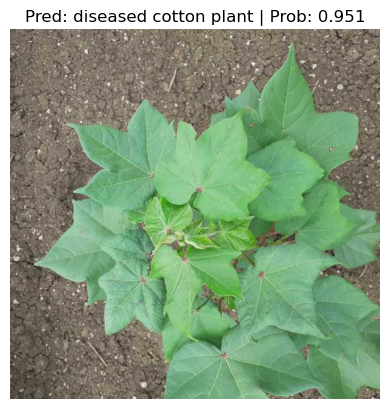

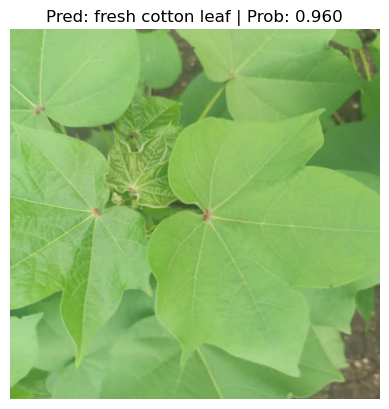

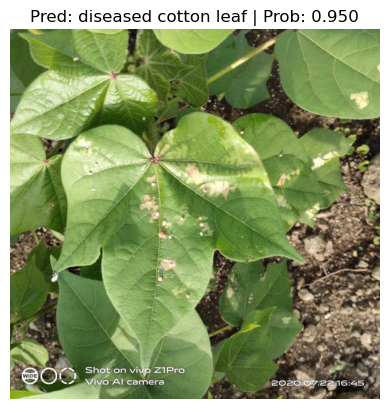

In [169]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(val_path).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=classnames,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

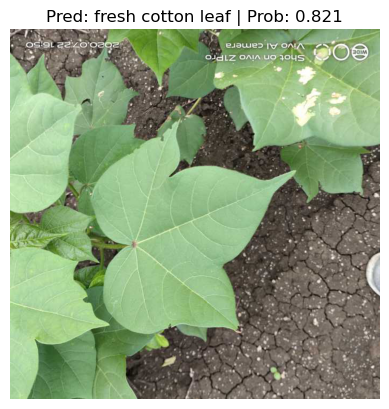

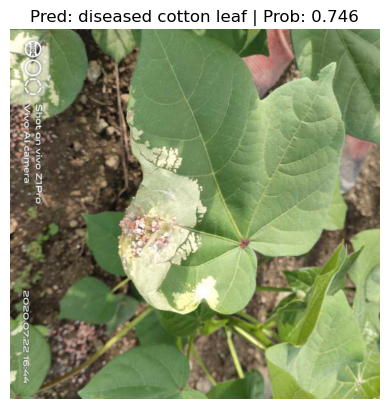

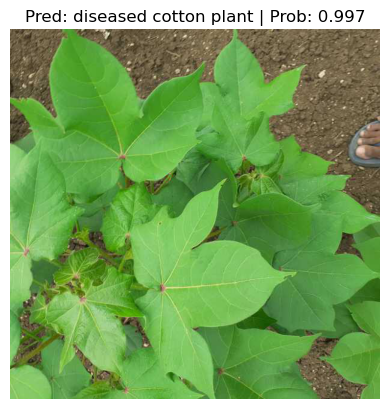

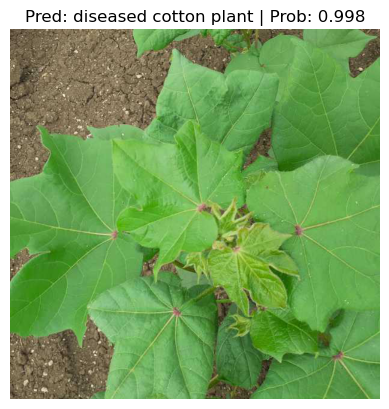

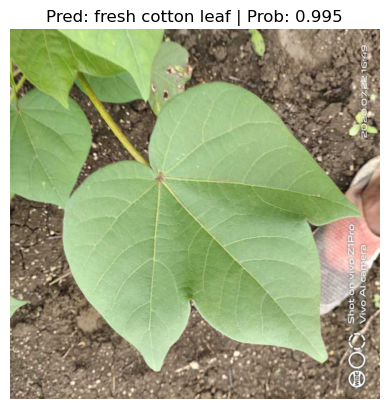

In [177]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 5
test_image_path_list = list(Path(val_path).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=classnames,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

In [8]:
from pathlib import Path

pretrained_effnetb2_model_size = Path("cotton_disease_model_transfer_1").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained EffNetB2 feature extractor model size: {pretrained_effnetb2_model_size} MB")

Pretrained EffNetB2 feature extractor model size: 15 MB


In [105]:
import pathlib
import torch
import torchvision
from PIL import Image
from timeit import default_timer as timer 
from tqdm.auto import tqdm
from typing import List, Dict

def pred_and_store(paths: List[pathlib.Path], 
                   model: torch.nn.Module,
                   transform: torchvision.transforms, 
                   class_names: List[str], 
                   device: str = "cuda" if torch.cuda.is_available() else "cpu") -> List[Dict]:
    
    pred_list = []
    
    for path in tqdm(paths):
        pred_dict = {}
        pred_dict["image_path"] = path
        class_name = path.parent.stem
        pred_dict["class_name"] = class_name
        
        start_time = timer()
        
        img = Image.open(path)
        transformed_image = transform(img).unsqueeze(0).to(device) 
        
        model.to(device)
        model.eval()
        
        with torch.inference_mode():
            pred_logit = model(transformed_image)
            pred_prob = torch.softmax(pred_logit, dim=1)
            pred_label = torch.argmax(pred_prob, dim=1)
            pred_class = class_names[pred_label.cpu()]

            pred_dict["pred_prob"] = round(pred_prob.unsqueeze(0).max().cpu().item(), 4)
            pred_dict["pred_class"] = pred_class
            
            end_time = timer()
            pred_dict["time_for_pred"] = round(end_time - start_time, 4)

        pred_dict["correct"] = class_name == pred_class
        
        pred_list.append(pred_dict)
    
    return pred_list

In [142]:
CottonModel = torch.load("cotton_disease_model_transfer_1", weights_only=False)
CottonModel.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [132]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to match model input size
    transforms.ToTensor(),          # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet values
])

In [144]:
num_images_to_plot = 5
test_image_path_list = list(pathlib.Path(val_path).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list, k=num_images_to_plot)

for image_path in test_image_path_sample:
    pred_results = pred_and_store(paths=[image_path], 
                                  model=CottonModel, 
                                  transform=transform,  
                                  class_names=classnames)
    print(pred_results)


  0%|          | 0/1 [00:00<?, ?it/s]

[{'image_path': WindowsPath('dataset/val/fresh cotton leaf/d (344)_iaip.jpg'), 'class_name': 'fresh cotton leaf', 'pred_prob': 0.4987, 'pred_class': 'fresh cotton leaf', 'time_for_pred': 0.1115, 'correct': True}]


  0%|          | 0/1 [00:00<?, ?it/s]

[{'image_path': WindowsPath('dataset/val/diseased cotton leaf/dis_leaf (138)_iaip.jpg'), 'class_name': 'diseased cotton leaf', 'pred_prob': 0.9585, 'pred_class': 'diseased cotton leaf', 'time_for_pred': 0.0864, 'correct': True}]


  0%|          | 0/1 [00:00<?, ?it/s]

[{'image_path': WindowsPath('dataset/val/diseased cotton plant/dd (600)_iaip.jpg'), 'class_name': 'diseased cotton plant', 'pred_prob': 0.9969, 'pred_class': 'diseased cotton plant', 'time_for_pred': 0.0942, 'correct': True}]


  0%|          | 0/1 [00:00<?, ?it/s]

[{'image_path': WindowsPath('dataset/val/diseased cotton leaf/dis_leaf (37)_iaip.jpg'), 'class_name': 'diseased cotton leaf', 'pred_prob': 0.9987, 'pred_class': 'diseased cotton leaf', 'time_for_pred': 0.0709, 'correct': True}]


  0%|          | 0/1 [00:00<?, ?it/s]

[{'image_path': WindowsPath('dataset/val/diseased cotton plant/dd (268)_iaip.jpg'), 'class_name': 'diseased cotton plant', 'pred_prob': 0.9996, 'pred_class': 'diseased cotton plant', 'time_for_pred': 0.0548, 'correct': True}]


In [148]:
device="cpu"
CottonModel=CottonModel.to(device)

In [150]:
next(iter(CottonModel.parameters())).device

device(type='cpu')

In [164]:
def predict(img, model, transform, classnames):
    transformed_image = transform(img).unsqueeze(0).to("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    with torch.inference_mode():
        pred_prob = torch.softmax(model(transformed_image), dim=1).cpu().squeeze(0)

    prediction_probs = {classnames[i]: float(pred_prob[i]) for i in range(len(classnames))}
    return prediction_probs


In [166]:
classnames

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [176]:
test_image_path_list = list(pathlib.Path(val_path).glob("*/*.jpg"))
random_image_path = random.choice(test_image_path_list)

print(f"[INFO] Predicting on image at path: {random_image_path}\n")
img = Image.open(random_image_path)

start_time = timer()
pred_dict = predict(img=img, model=model, transform=transform, classnames=classnames)
end_time = timer()
prediction_time = round(end_time - start_time, 4)

print("Prediction label and probability dictionary:")
print(pred_dict)
print(f"Prediction time: {prediction_time} seconds")

[INFO] Predicting on image at path: dataset\val\fresh cotton leaf\d (197)_iaip.jpg

Prediction label and probability dictionary:
{'diseased cotton leaf': 0.2677712142467499, 'diseased cotton plant': 0.018002090975642204, 'fresh cotton leaf': 0.7011990547180176, 'fresh cotton plant': 0.013027656823396683}
Prediction time: 0.0844 seconds


In [184]:

example_list = [[str(filepath)] for filepath in random.sample(test_image_path_list ,k=3)]
example_list

[['dataset\\val\\diseased cotton plant\\dd (209)_iaip.jpg'],
 ['dataset\\val\\diseased cotton plant\\dd (647)_iaip.jpg'],
 ['dataset\\val\\diseased cotton leaf\\dis_leaf (323)_iaip.jpg']]

In [188]:
!pip install gradio

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------------------------------- 2.1/46.2 MB 13.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/46.2 MB 12.4 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/46.2 MB 12.5 MB/s eta 0:00:04
   -------- ------------------------------- 9.7/46.2 MB 12.3 MB/s eta 0:00:03
   ---------- ----------------------------- 12.3/46.2 MB 12.4 MB/s eta 0:00:03
   ------------ --------------------------- 14.9/46.2 MB 12.4 MB/s eta 0:00:03
   --------------- ------------------------ 17.6/46.2 MB 12.4 MB/s eta 0:00:03
   ----------------- ---------------------- 19.9/46.2 MB 12.5 MB/s eta 0:00:03
   ------------------- -------------------- 22.5/46.2 MB 12.4 MB/s eta 0:00:02
   --------------------- ------------------ 24.9/46.2 MB 12.4 MB/s eta 0:00:02
   ----------------------- ---------------- 27.5/46.2 MB 12.4 MB/s eta 0:00:02
   -------------------------- ------------- 30.1/46.2 MB 12.4 MB/

In [192]:
import gradio as gr

# Wrapper function for Gradio
def gradio_predict(img):
    start_time = timer()
    pred_dict = predict(img=img, model=model, transform=transform, classnames=classnames)
    end_time = timer()
    prediction_time = round(end_time - start_time, 4)
    return pred_dict, prediction_time

# Define Gradio interface
demo = gr.Interface(
    fn=gradio_predict,  # Use the wrapped function
    inputs=gr.Image(type="pil"),  
    outputs=[
        gr.Label(num_top_classes=3, label="Predictions"),  # Display top 3 predictions
        gr.Number(label="Prediction time (s)")  # Show prediction time
    ]
)

# Launch the Gradio app
demo.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [212]:
import shutil
from pathlib import Path

# Create Cotton Disease demo path
cotton_disease_demo_path = Path("demos/Cotton_Disease/")

# Remove files that might already exist there and create new directory
if cotton_disease_demo_path.exists():
    shutil.rmtree(cotton_disease_demo_path)
# If the file doesn't exist, create it anyway
cotton_disease_demo_path.mkdir(parents=True, exist_ok=True)

# Create examples directory
cotton_leaf_examples_path = cotton_disease_demo_path / "examples"
cotton_leaf_examples_path.mkdir(parents=True, exist_ok=True)

# Define image paths (ensure correct paths and no spaces in folder names)
cotton_leaf_examples = [
    Path("dataset/val/diseased cotton leaf/dis_leaf (113)_iaip.jpg"),
    Path("dataset/val/fresh cotton leaf/d (119)_iaip.jpg"),
    Path("dataset/val/fresh cotton plant/dsd (222)_iaip.jpg")
]

# Copy images to the examples directory
for example in cotton_leaf_examples:
    if example.exists():
        destination = cotton_leaf_examples_path / example.name
        print(f"[INFO] Copying {example} to {destination}")
        shutil.copy2(src=example, dst=destination)
    else:
        print(f"[ERROR] File not found: {example}")

[INFO] Copying dataset\val\diseased cotton leaf\dis_leaf (113)_iaip.jpg to demos\Cotton_Disease\examples\dis_leaf (113)_iaip.jpg
[INFO] Copying dataset\val\fresh cotton leaf\d (119)_iaip.jpg to demos\Cotton_Disease\examples\d (119)_iaip.jpg
[INFO] Copying dataset\val\fresh cotton plant\dsd (222)_iaip.jpg to demos\Cotton_Disease\examples\dsd (222)_iaip.jpg


In [ ]:

%%writefile demos/foodvision_mini/model.py
import torch
import torchvision
from torch import nn

def create_effnetb0_model(num_classes: int, seed: int = 42):
    """Creates an EfficientNetB0 feature extractor model and transforms.

    Args:
        num_classes (int): Number of classes in the classifier head.
        seed (int, optional): Random seed for reproducibility. Defaults to 42.

    Returns:
        model (torch.nn.Module): EfficientNetB0 feature extractor model.
        transforms (torchvision.transforms): Image transforms for the model.
    """
    # Load pre-trained EfficientNet-B0 model
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT  
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b0(weights=weights)  

    # Freeze feature extractor layers
    for param in model.features.parameters():
        param.requires_grad = False

    # Set random seed for reproducibility
    torch.manual_seed(seed)
    
    # Modify the classifier
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2),
        nn.Linear(in_features=1280, out_features=num_classes, bias=True)
    )
    
    return model, transforms